Model unknown

  Variables:
    x : Size=11, Index=[1:11]
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          1 :     0 :   1.0 :     1 : False : False : Binary
          2 :     0 :   1.0 :     1 : False : False : Binary
          3 :     0 :   1.0 :     1 : False : False : Binary
          4 :     0 :   1.0 :     1 : False : False : Binary
          5 :     0 :   0.0 :     1 : False : False : Binary
          6 :     0 :   1.0 :     1 : False : False : Binary
          7 :     0 :   1.0 :     1 : False : False : Binary
          8 :     0 :   1.0 :     1 : False : False : Binary
          9 :     0 :   1.0 :     1 : False : False : Binary
         10 :     0 :   1.0 :     1 : False : False : Binary
         11 :     0 :   0.0 :     1 : False : False : Binary

  Objectives:
    obj : Size=1, Index=None, Active=True
        Key  : Active : Value
        None :   True :  46.0

  Constraints:
    res1 : Size=1
        Key  : Lower : Body : Upper
        None :  None : 

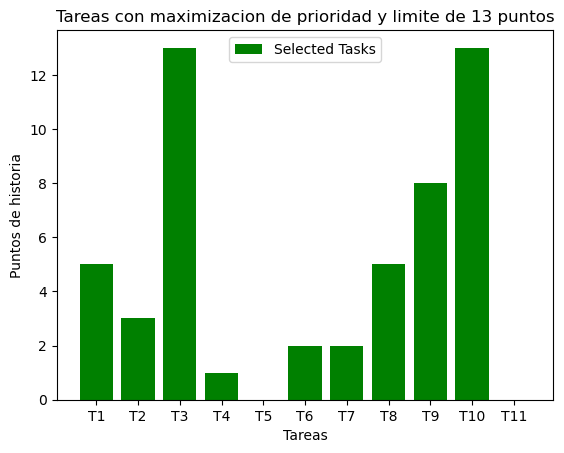

In [2]:
from __future__ import division
from pyomo.environ import *
from pyomo.opt import SolverFactory
import matplotlib.pyplot as plt

Model = ConcreteModel()

numero_desarrolladores = 4
limite_puntos = 13
num_tareas= 11
t = RangeSet(1, num_tareas)
puntos_historia = {1:5, 2:3, 3:13, 4:1, 5:21, 6:2, 7:2, 8:5, 9:8, 10:13, 11:21}
prioridades = {1:7, 2:5, 3:6, 4:3, 5:1, 6:4, 7:6, 8:6, 9:2, 10:7, 11:6}

Model.x = Var(t, domain=Binary)
Model.obj = Objective(expr = sum(Model.x[i]*prioridades[i] for i in t if puntos_historia[i]<=13), sense = maximize)
Model.res1 = Constraint(expr = sum(Model.x[i]*puntos_historia[i] for i in t) <= limite_puntos*numero_desarrolladores)

SolverFactory('glpk').solve(Model)
Model.display()

tareas = list(t)
puntos_historia_lista = [puntos_historia[i] for i in t]
selected = [Model.x[i]() for i in t]

plt.bar(tareas, [sp * sel for sp, sel in zip(puntos_historia_lista, selected)], color='green', label='Selected Tasks')
plt.xlabel("Tareas")
plt.ylabel("Puntos de historia")
plt.title("Tareas con maximizacion de prioridad y limite de 13 puntos")
plt.xticks(tareas, [f"T{i}" for i in tareas])
plt.legend()
plt.show()

Model unknown

  Variables:
    x : Size=15, Index=[1:3]*[1:5]
        Key    : Lower : Value : Upper : Fixed : Stale : Domain
        (1, 1) :     0 :   1.0 :     1 : False : False : Binary
        (1, 2) :     0 :   0.0 :     1 : False : False : Binary
        (1, 3) :     0 :   0.0 :     1 : False : False : Binary
        (1, 4) :     0 :   0.0 :     1 : False : False : Binary
        (1, 5) :     0 :   1.0 :     1 : False : False : Binary
        (2, 1) :     0 :   0.0 :     1 : False : False : Binary
        (2, 2) :     0 :   1.0 :     1 : False : False : Binary
        (2, 3) :     0 :   1.0 :     1 : False : False : Binary
        (2, 4) :     0 :   0.0 :     1 : False : False : Binary
        (2, 5) :     0 :   0.0 :     1 : False : False : Binary
        (3, 1) :     0 :   0.0 :     1 : False : False : Binary
        (3, 2) :     0 :   0.0 :     1 : False : False : Binary
        (3, 3) :     0 :   0.0 :     1 : False : False : Binary
        (3, 4) :     0 :   1.0 :     1 : 

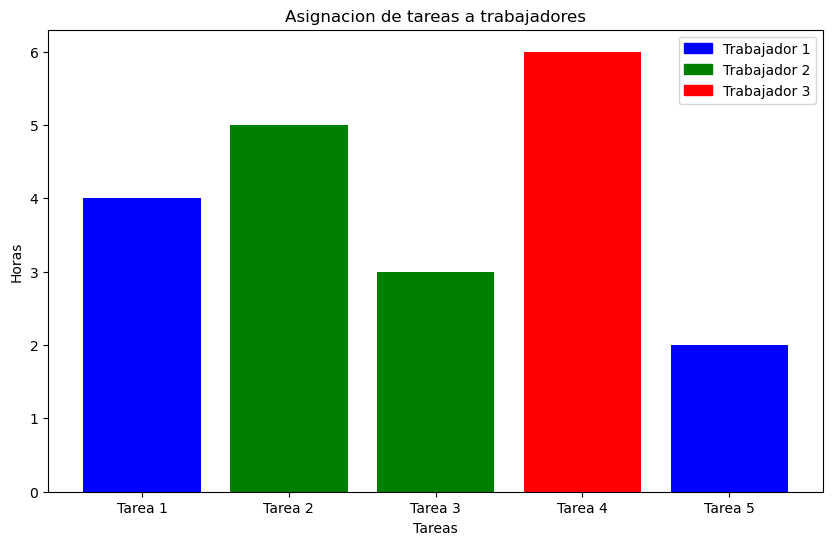

In [18]:
#MODELO
Model = ConcreteModel()

#DATOS
tiempos_trabajadores = {1:8, 2:10, 3:6}
trabajo_ganancia = {1:50, 2:60, 3:40, 4:70, 5:30}
trabajo_tiempo = {1:4, 2:5, 3:3, 4:6, 5:2}
tasks = RangeSet(1,5)
workers = RangeSet(1,3)

#VARIABLES
Model.x = Var(workers, tasks, domain=Binary)

#FUNCION OBJETIVO
Model.obj = Objective(
    expr = sum(Model.x[w,t]*trabajo_ganancia[t] for w in workers for t in tasks),
    sense = maximize
    )

#RESTRICCIONES
def constraint1(model, t):
    return sum(model.x[w,t] for w in workers)<=1
Model.constraint1 = Constraint(tasks, rule = constraint1)

def constraint2(model, w):
    return sum(Model.x[w,t]*trabajo_tiempo[t] for t in tasks) <= tiempos_trabajadores[w]
Model.constraint2 = Constraint(workers, rule=constraint2)

SolverFactory('glpk').solve(Model)
Model.display()

tareas = []
horas = []
colores = []
color_map = {1:'blue', 2:'green', 3:'red'}

for t in tasks:
    for w in workers:
        if Model.x[w,t].value == 1:
            tareas.append(f'Tarea {t}')
            horas.append(trabajo_tiempo[t])
            colores.append(color_map[w])
plt.figure(figsize=(10,6))
plt.bar(tareas, horas, color=colores)

plt.xlabel('Tareas')
plt.ylabel('Horas')
plt.title('Asignacion de tareas a trabajadores')

handles = [plt.Rectangle((0, 0), 1, 1, color=color_map[w]) for w in workers]
labels = [f'Trabajador {w}' for w in workers]
plt.legend(handles, labels)
plt.show()


Model unknown

  Variables:
    x : Size=15, Index=[1:3]*[1:5]
        Key    : Lower : Value : Upper : Fixed : Stale : Domain
        (1, 1) :     0 :   1.0 :     1 : False : False : Binary
        (1, 2) :     0 :   0.0 :     1 : False : False : Binary
        (1, 3) :     0 :   0.0 :     1 : False : False : Binary
        (1, 4) :     0 :   0.0 :     1 : False : False : Binary
        (1, 5) :     0 :   0.0 :     1 : False : False : Binary
        (2, 1) :     0 :   0.0 :     1 : False : False : Binary
        (2, 2) :     0 :   1.0 :     1 : False : False : Binary
        (2, 3) :     0 :   1.0 :     1 : False : False : Binary
        (2, 4) :     0 :   0.0 :     1 : False : False : Binary
        (2, 5) :     0 :   1.0 :     1 : False : False : Binary
        (3, 1) :     0 :   0.0 :     1 : False : False : Binary
        (3, 2) :     0 :   0.0 :     1 : False : False : Binary
        (3, 3) :     0 :   0.0 :     1 : False : False : Binary
        (3, 4) :     0 :   1.0 :     1 : 

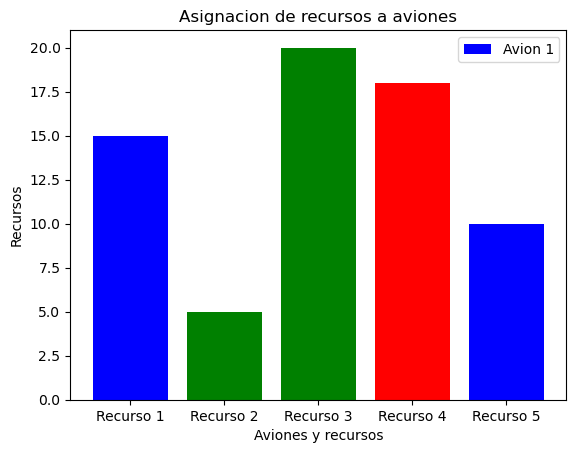

In [40]:
Model  = ConcreteModel()

Planes = RangeSet(1, 3)
Resources = RangeSet(1, 5)
planes_weight = {1:30, 2:40, 3:50}
planes_volume = {1:25, 2:30, 3:35}
resources_name = {1:"Alimentos Básicos", 2:"Medicinas", 3:"Equipos médicos", 4:"Agua potable", 5:"Mantas"}
resources_value = {1:50, 2:100, 3:120, 4:60, 5:40}
resources_weight = {1:15, 2:5, 3:20, 4:18, 5:10}
resources_volume = {1:8, 2:2, 3:10, 4:12, 5:6}

Model.x = Var(Planes, Resources, domain=Binary)

Model.obj = Objective(expr=sum(Model.x[p,r]*resources_value[r] for p in Planes for r in Resources), sense=maximize)

def ConstraintOneResource(Model, r):
    return sum(Model.x[p,r] for p in Planes) <= 1
Model.ConstraintOneResource = Constraint(Resources, rule = ConstraintOneResource)

def WeightConstraint(Model, p):
    return sum(Model.x[p,r]*resources_weight[r] for r in Resources) <= planes_weight[p]
Model.WeightConstraint = Constraint(Planes, rule = WeightConstraint)

def VolumeConstraint(Model, p):
    return sum(Model.x[p,r]*resources_volume[r] for r in Resources) <= planes_volume[p]
Model.VolumeConstraint = Constraint(Planes, rule = VolumeConstraint)

def NoMedicinesInPlane1(Model):
    return Model.x[1, 2] == 0  # Medicinas es el recurso 2 y Avión 1 es el avión 1
Model.NoMedicinesInPlane1 = Constraint(rule=NoMedicinesInPlane1)

def CompabilityConstraint(Model, p):
    return Model.x[p, 3] + Model.x[p, 4] <= 1  # Equipos Médicos es el recurso 3 y Agua Potable es el recurso 4
Model.CompabilityConstraint = Constraint(Planes, rule=CompabilityConstraint)

SolverFactory('glpk').solve(Model)
Model.display()


recursos = []
pesos = []
colores = []
color_map = {1:'blue',2:'green',3:'red'}
for r in Resources:
    for p in Planes:
        if Model.x[p,r].value == 1:
            recursos.append(f'Recurso {r}')
            pesos.append(resources_weight[r])
            colores.append(color_map[p])
plt.bar(recursos,pesos, color=colores)            

"""tareas = []
horas = []
colores = []
color_map = {1:'blue', 2:'green', 3:'red'}

for t in tasks:
    for w in workers:
        if Model.x[w,t].value == 1:
            tareas.append(f'Tarea {t}')
            horas.append(trabajo_tiempo[t])
            colores.append(color_map[w])
plt.figure(figsize=(10,6))
plt.bar(tareas, horas, color=colores)"""

plt.xlabel('Aviones y recursos')
plt.ylabel('Recursos')
plt.title('Asignacion de recursos a aviones')

#handles = [plt.Rectangle((0, 0), 1, 1, color=color_map[w]) for w in workers]
labels = [f'Avion {p}' for p in Planes]
plt.legend(labels)#handles, labels)
plt.show()
